In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import threading
import pickle
import joblib
import copy
import threading
from sklearn import preprocessing, model_selection, base, metrics, linear_model, pipeline, ensemble, svm, multiclass, neighbors, datasets, impute, compose
from scipy import ndimage, spatial, stats
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

2024-07-10 17:15:07.873744: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 17:15:08.120291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 17:15:08.793997: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing['ocean_proximity'].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
X, y = housing.drop('median_house_value', axis=1), housing['median_house_value']

In [12]:
X_sub = X['housing_median_age']

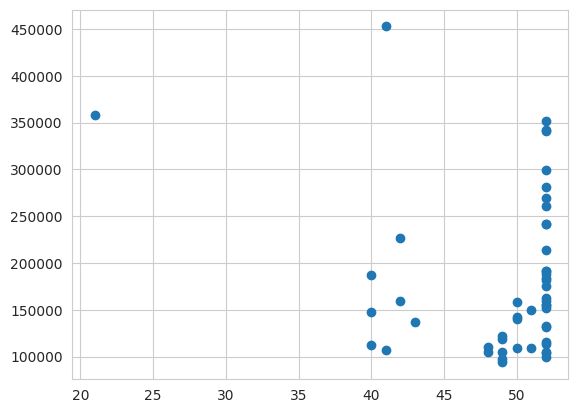

In [13]:
plt.scatter(X_sub[:50], y[:50])

In [19]:
lr = linear_model.LinearRegression()
lr.fit((X_sub.values).reshape(-1,1), y)

LinearRegression()

In [21]:
lr.score(X_sub.values.reshape(-1,1), y)

0.011156305266710853

In [22]:
X_sub = X_sub.values.reshape(-1,1)

In [23]:
poly = preprocessing.PolynomialFeatures(degree=2)
X_sub_new = poly.fit_transform(X_sub)

In [24]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_sub_new, y)

LinearRegression()

In [6]:
a, b = tf.unique(tf.constant(['a', 'b', 'c', 'a']))
a, b

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 0], dtype=int32)>)

In [7]:
tf.one_hot(b, len(a))

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [13]:
vocab = ['a', 'b', 'c', 'd']
indices = tf.range(len(vocab), dtype=tf.int64)

init_table = tf.lookup.KeyValueTensorInitializer(vocab, indices)
lookup_table = tf.lookup.StaticVocabularyTable(init_table, num_oov_buckets=2)

In [16]:
tf.one_hot(lookup_table.lookup(tf.constant(['a', 'b', 'b', 'a', 'e'])), depth=len(vocab)+2)

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [21]:
embedding = tf.random.uniform((6, 2)) #discouraged

cats = lookup_table.lookup(tf.constant(['a', 'b', 'b', 'a', 'e']))
tf.nn.embedding_lookup(embedding, cats)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.33301806, 0.3807509 ],
       [0.5610728 , 0.71595013],
       [0.5610728 , 0.71595013],
       [0.33301806, 0.3807509 ],
       [0.76269495, 0.02607489]], dtype=float32)>

In [10]:
tf.random.stateless_binomial(shape=[3], counts=[1, 2, 3], probs=0.5, seed=[0, 0])
a = ...

In [16]:
with tf.device('/CPU:0'):
    counts = [10., 20.]
    # Probability of success.
    probs = [0.8]

    rng = tf.random.Generator.from_seed(seed=234)
    binomial_samples = rng.binomial(shape=[2], counts=counts, probs=probs)


    counts = ... # Shape [3, 1, 2]
    probs = ...  # Shape [1, 4, 2]
    shape = [3, 4, 3, 4, 2]
    rng = tf.random.Generator.from_seed(seed=1717)
    # Sample shape will be [3, 4, 3, 4, 2]
    binomial_samples = rng.binomial(shape=shape, counts=counts, probs=probs)


ValueError: Attempt to convert a value (Ellipsis) with an unsupported type (<class 'ellipsis'>) to a Tensor.

In [22]:
embedding

<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[0.33301806, 0.3807509 ],
       [0.5610728 , 0.71595013],
       [0.63383067, 0.26450765],
       [0.59786415, 0.5320476 ],
       [0.22355258, 0.9348483 ],
       [0.76269495, 0.02607489]], dtype=float32)>

In [24]:
import random
import string
text = ''.join(random.choices(string.ascii_letters + ' ',  k=1000000))
text[:100]

'tZXACedjmz kwUaqyeZDlleKCRZJvfrXSrmmKYKzqxCyvxxotHRZEfUXGOyqaBf UJnLBBYDnMuknmdFsTvPhlZwrZvJKvvAStCd'

In [21]:
tokenizer = keras.layers.TextVectorization()
tokenizer.adapt(tf.constant(text))
text = tokenizer(text)
text

<tf.Tensor: shape=(18535,), dtype=int64, numpy=array([ 1039, 10248, 15806, ..., 12841,  6160,  9416])>

In [23]:
text_tensor = tf.data.Dataset.from_tensor_slices([text])
# text_tensor = text_tensor.window(100, 101, 1, True)
for i in text_tensor.take(1):
    print(i)

tf.Tensor([ 1039 10248 15806 ... 12841  6160  9416], shape=(18535,), dtype=int64)


2024-07-10 17:19:37.608620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [26]:
shakespeare_url = "https://homl.info/shakespeare"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
def tokenize_text_from_scratch(text, oov_buckets=10):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    
    text = text.split(' ')
    
    vocab, _ = tf.unique(tf.constant(text))
    indices = tf.range(len(vocab), dtype=tf.int64)
    
    init_table = tf.lookup.KeyValueTensorInitializer(vocab, indices)
    lookup_table = tf.lookup.StaticVocabularyTable(init_table, num_oov_buckets=oov_buckets)
    
    

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [29]:
class TokenizerFromScratch(keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def adapt(self, text):
        text = text.lower()
        text = text.replace('\n', ' ')
        text = text.replace('\r', ' ')
        text = text.replace('\t', ' ')

        text = text.split(' ')

        vocab, _ = tf.unique(tf.constant(text))
        indices = tf.range(len(vocab), dtype=tf.int64)

        init_table = tf.lookup.KeyValueTensorInitializer(vocab, indices)
        self.lookup_table = tf.lookup.StaticVocabularyTable(init_table, num_oov_buckets=10)
    
    def call(self, text):
        return self.lookup_table.lookup(text)          


In [30]:
tokenizer = TokenizerFromScratch()
tokenizer.adapt(shakespeare_text)

In [32]:
tokenizer(tf.constant(['First', 'world']))

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([23647,   846])>

In [81]:
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    name=None,
)

In [82]:
vectorizer.adapt(shakespeare_text)
vectorizer.get_vocabulary()[:10]


['', '[UNK]', 'the', 'and', 'to', 'i', 'of', 'you', 'my', 'a']

In [83]:
vectorizer(shakespeare_text)

<tf.Tensor: shape=(202646,), dtype=int64, numpy=array([  89,  270,  138, ...,   26,  129, 1874])>

In [84]:
def preprocess(text, vectorizer=vectorizer, train_size=0.9):
    text = vectorizer(text)
    train_size = int(len(text) * train_size)
    text_dataset_train, text_dataset_test = tf.data.Dataset.from_tensor_slices(text[:train_size]), tf.data.Dataset.from_tensor_slices(text[train_size:])
    return text_dataset_train, text_dataset_test
    

In [85]:
text_dataset_train, text_dataset_test = preprocess(shakespeare_text)
text_dataset_train, text_dataset_test

(<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>,
 <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>)

In [86]:
for i in text_dataset_train.take(1):
    print(i)

tf.Tensor(89, shape=(), dtype=int64)


2024-07-10 18:31:13.255228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [87]:
vocab = vectorizer.get_vocabulary()
index_lookup = dict(zip(range(len(vocab)), vocab))

def tokens_to_text(sequence):
    return " ".join([index_lookup[token] for token in sequence if token != 0])

tokens_to_text([1, 2, 3, 4, 5])

'[UNK] the and to i'

In [97]:
window = text_dataset_train.window(size=101, shift=1, stride=1, drop_remainder=True)

In [99]:
window_flat = window.flat_map(lambda x: x.batch(101))
for i in window_flat.batch(32).take(1):
    print(i)

tf.Tensor(
[[  89  270  138 ...   60   58  573]
 [ 270  138   36 ...   58  573   79]
 [ 138   36  982 ...  573   79   22]
 ...
 [ 270   89    7 ...   79    2 2346]
 [  89    7   93 ...    2 2346    6]
 [   7   93 1187 ... 2346    6   40]], shape=(32, 101), dtype=int64)


2024-07-10 18:39:27.737226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [114]:
dataset = window_flat.shuffle(10000).batch(32)
dataset = dataset.map(lambda x: (x[:, :-1], x[:, 1:]))
dataset = dataset.prefetch(1)

In [115]:
vocab_size = len(vocab)
emb = keras.layers.Embedding(input_dim=vocab_size, output_dim=32)

In [141]:
for i in dataset.take(1):
    print((i))

(<tf.Tensor: shape=(32, 100), dtype=int64, numpy=
array([[    5,    15,   215, ...,  8970,  4445,    28],
       [  497,    14,    79, ...,  1636,     8,   502],
       [12414,   483,    27, ...,    99,     4,   101],
       ...,
       [  106,   293,   120, ...,   167,  1450,    13],
       [   19,  4222,    57, ...,    90,    55,     7],
       [    3,    46,  2095, ...,    73,  1055,  1560]])>, <tf.Tensor: shape=(32, 100), dtype=int64, numpy=
array([[  15,  215,   10, ..., 4445,   28,  269],
       [  14,   79,  139, ...,    8,  502,    5],
       [ 483,   27,  141, ...,    4,  101,    3],
       ...,
       [ 293,  120, 1730, ..., 1450,   13,   22],
       [4222,   57,    2, ...,   55,    7,   87],
       [  46, 2095,    6, ..., 1055, 1560,  752]])>)


2024-07-10 19:13:54.212754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [142]:
model = keras.models.Sequential([
    emb,
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='softmax')
])

In [143]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
for i in dataset.take(1):
    print(model(i[1]))

2024-07-10 19:13:07.542320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: -input rank(-1) <= split_dim < input rank (1), but got 1
2024-07-10 19:13:07.543452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [32,32] vs. [0]


InvalidArgumentError: Exception encountered when calling LSTMCell.call().

[1m{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:GPU:0}} In[0] and In[1] has different ndims: [32,32] vs. [0] [Op:MatMul] name: [0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(32, 32), dtype=float32)
  • states=('tf.Tensor(shape=(32, 32), dtype=float32)', 'tf.Tensor(shape=(32, 32), dtype=float32)')
  • training=False

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed

# Example parameters
vocab_size = 20000  # Adjust based on your vocabulary size
embedding_dim = 32
sequence_length = 100  # The length of the sequences in the dataset

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    Dense(vocab_size, activation='softmax')  # Output layer for each time step
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Assuming dataset is already defined
# Adjust labels to match the expected shape
# def preprocess_data(X, y):
#     return X, tf.expand_dims(y, -1)

# dataset = dataset.map(preprocess_data)

# Train the model
model.fit(dataset, epochs=10)


/home/thory/miniconda3/envs/small-projects-ml/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
     91/Unknown 5s 37ms/step - accuracy: 0.0369 - loss: 8.7538

KeyboardInterrupt: 